In [1]:
import algo_rbm
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


0 158.75 1623.8944436041302
50 81.25 -10084.578456664722
100 63.21666666666667 -14775.227141484243
150 53.35 -17963.89354759156
200 46.733333333333334 -20430.63921011648
250 44.53333333333333 -22289.142994750346
300 40.56666666666667 -23863.166720915357
350 37.0 -25690.426188646525
400 33.583333333333336 -27273.077434097093
450 31.25 -28354.889580881452
500 30.416666666666668 -30010.507253423162
550 27.5 -31120.480441472395
600 26.666666666666668 -32259.78732798118
650 25.483333333333334 -33509.67908867889
700 24.533333333333335 -34176.85633879667
750 23.133333333333333 -35245.78847672394
800 21.466666666666665 -36217.38132906858
850 20.5 -37000.34665253513
900 21.05 -37801.559692670344
950 19.35 -38462.83255802188
-39382.49166468367
0 159.63333333333333 2221.1583092399437
50 88.55 -7778.251557468298
100 69.3 -13058.707081063138
150 55.65 -16895.96779769081
200 46.4 -19968.830663921486
250 40.35 -22468.376463152556
300 35.166666666666664 -24368.34907637563
350 31.616666666666667 -26239

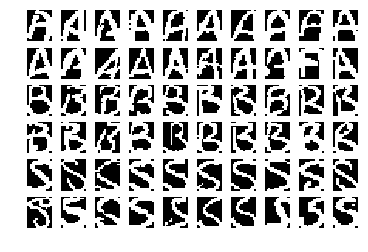

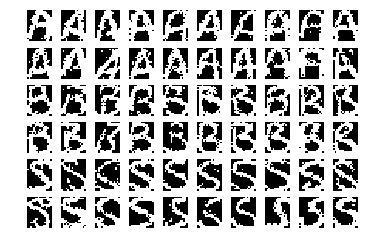

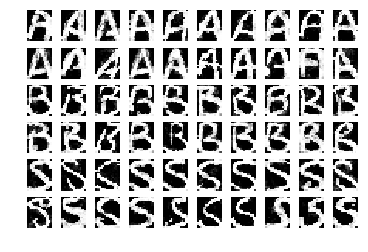

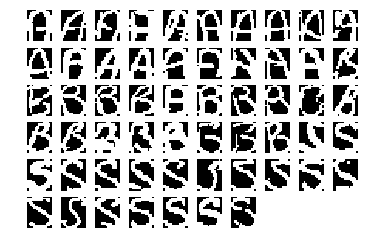

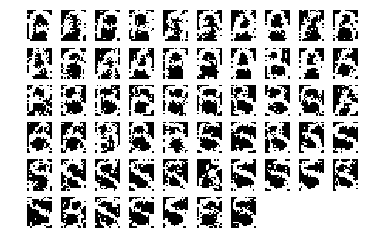

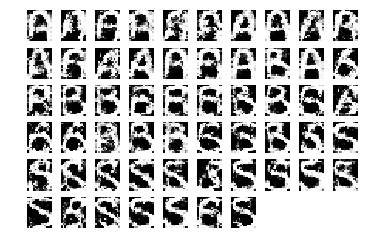

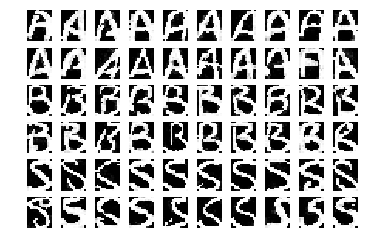

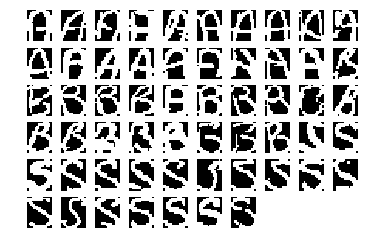

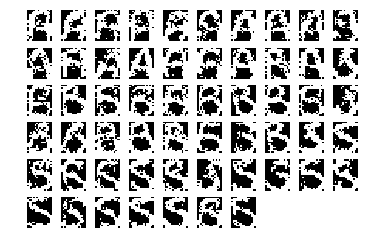

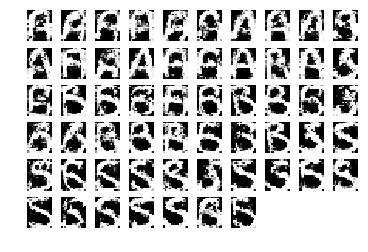

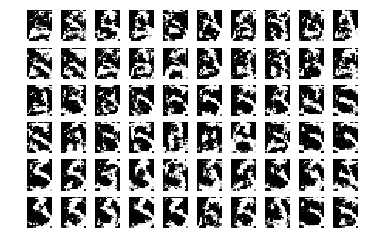

In [3]:
algo_rbm.learn_letters()

In [4]:
def test_rbm3():

    import algo_rbm

    r = algo_rbm.rbm(5, 2,nCDsteps=1,momentum=0.9,nepochs = 100)
    inputs = np.array([[0,1,0,1,1],[1,1,0,1,0],[1,1,0,0,1],[1,1,0,0,1], [1,0,1,0,1],[1,1,1,0,0]])
    r.contrastive_divergence(inputs)
    #r.cddemo(inputs)
    print("weights : ")
    print (r.weights)
    print("visiblebias : ")
    print (r.visiblebias)
    print("hiddenbias : ")
    print (r.hiddenbias)
    print("hiddenact : ")
    print (r.hiddenact)
    print ("---")
  
    test = np.array([[1,1,0,0,1]])
    r.compute_hidden(test)
    print("hiddenact : ")
    print (r.hiddenact)

    test = np.array([[1,0]])
    r.compute_visible(test)
    print("visibleact : ")
    print (r.visibleact)

    test = np.array([[1,0]])
    r.compute_visible(test)
    print("visibleact : " )
    print (r.visibleact)

    test = np.array([[1,0]])
    r.compute_visible(test)
    print("visibleact : ")
    print (r.visibleact)

In [5]:
test_rbm3()

0 3.6666666666666665 -0.13052369586583956
50 2.1666666666666665 -10.57673276152342
-17.891619677583943
weights : 
[[-2.28516349  2.7727181 ]
 [-1.40038024  0.20603277]
 [-2.48069158  0.74267616]
 [-1.20226985 -1.54908708]
 [-2.43788539 -0.04665586]]
visiblebias : 
[ 0.28600429  1.32643825 -0.97929738 -0.13765434  1.15856154]
hiddenbias : 
[-0.83518889 -1.15775178]
hiddenact : 
[[0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
---
hiddenact : 
[[0. 1.]]
visibleact : 
[[0. 0. 0. 1. 0.]]
visibleact : 
[[0. 0. 0. 0. 0.]]
visibleact : 
[[0. 0. 0. 1. 0.]]


In [6]:
import RBM

In [7]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
Xtrain = trX.astype(np.float32)
Xtest = teX.astype(np.float32)
_, m = Xtrain.shape
rbm = RBM.RBM(m, 100)

In [9]:
#Initialize all variables
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    rbm.set_session(sess)
    err = rbm.fit(Xtrain)
    out = rbm.reconstruct(teX[0:100])  # Let us reconstruct Test Data

training epoch 0 batch 0 cost 2.5752992630004883
training epoch 0 batch 100 cost 0.30392059683799744
training epoch 0 batch 200 cost 0.2777904272079468
training epoch 0 batch 300 cost 0.2657003402709961
training epoch 0 batch 400 cost 0.24841079115867615
training epoch 0 batch 500 cost 0.2601306736469269


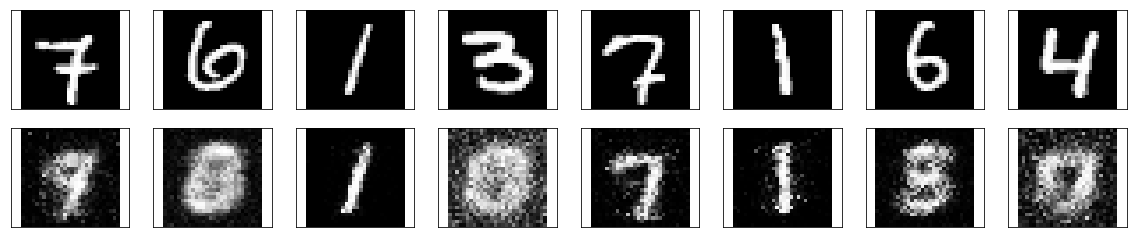

In [10]:
row, col = 2, 8
idx = np.random.randint(0, 100, row * col // 2)
f, axarr = plt.subplots(row, col, sharex=True, sharey=True, figsize=(20,4))
for fig, row in zip([teX,out], axarr):
    for i,ax in zip(idx,row):
        ax.imshow(fig[i].reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)